In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
DIR = 'wandb_plots/'
PLOTS_PATH = 'C:/Users/jrath/Pictures/Plots/' # output directory for plots

## Loss multiple min/max/mean

In [24]:
def print_and_save_loss(csv_file_path_loss_multi_mean, save_path, title):
    multi_loss_df = pd.read_csv(DIR + csv_file_path_loss_multi_mean)

    # Find relevant validation loss columns
    val_loss_columns = [col for col in multi_loss_df.columns if 'train/loss' in col and '__' not in col]

    # Prepare for plotting
    plot_df = multi_loss_df.melt(id_vars=['epoch'], value_vars=val_loss_columns,
                    var_name='Model', value_name='Training Loss')

    # Clean model names
    plot_df['Model'] = plot_df['Model'].str.replace(' - train/loss', '', regex=False)

    # Group by epoch to compute mean, min, max
    agg_df = plot_df.groupby('epoch')['Training Loss'].agg(['mean', 'min', 'max']).reset_index()

    # Set the seaborn color palette to viridis
    sns.set_palette('viridis')

    # Now plot
    plt.figure(figsize=(12, 8))

    # Shaded area between min and max (automatic first color in seaborn palette)
    sns.lineplot(x=agg_df['epoch'], y=agg_df['min'], alpha=0.0, color=sns.color_palette()[0])  # Dummy to register color

    plt.fill_between(agg_df['epoch'], agg_df['min'], agg_df['max'], color=sns.color_palette()[5], alpha=0.7, label='Min-Max Range')

    # Mean line
    sns.lineplot(x='epoch', y='mean', data=agg_df, label='Mean Training Loss')

    # Titles and labels
    plt.title(title, fontsize=18)
    plt.xlabel('Epoch', fontsize=16)
    plt.ylabel('Training Loss', fontsize=16)
    plt.ylim(0, 1)
    plt.xlim(agg_df['epoch'].min(), agg_df['epoch'].max())
    plt.grid(True)
    plt.legend(fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.tight_layout()
    plt.savefig(PLOTS_PATH + save_path, dpi=600, bbox_inches='tight')
    plt.show()

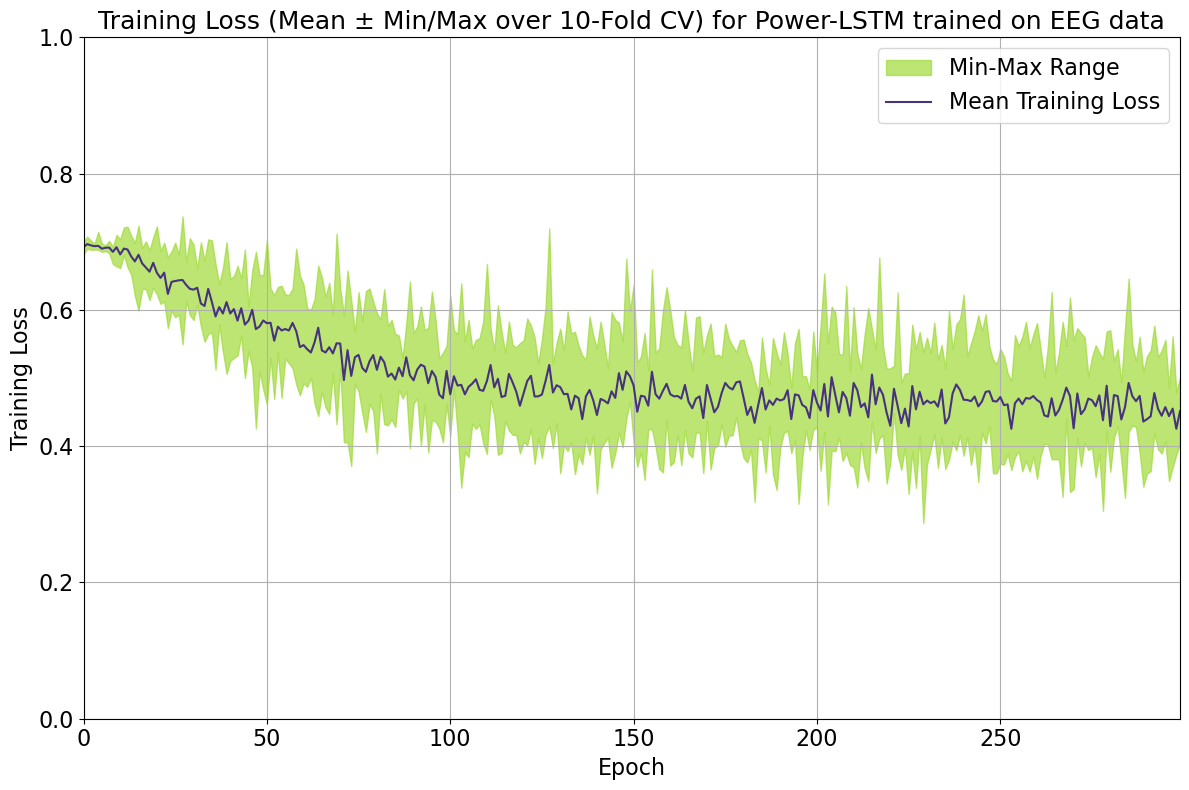

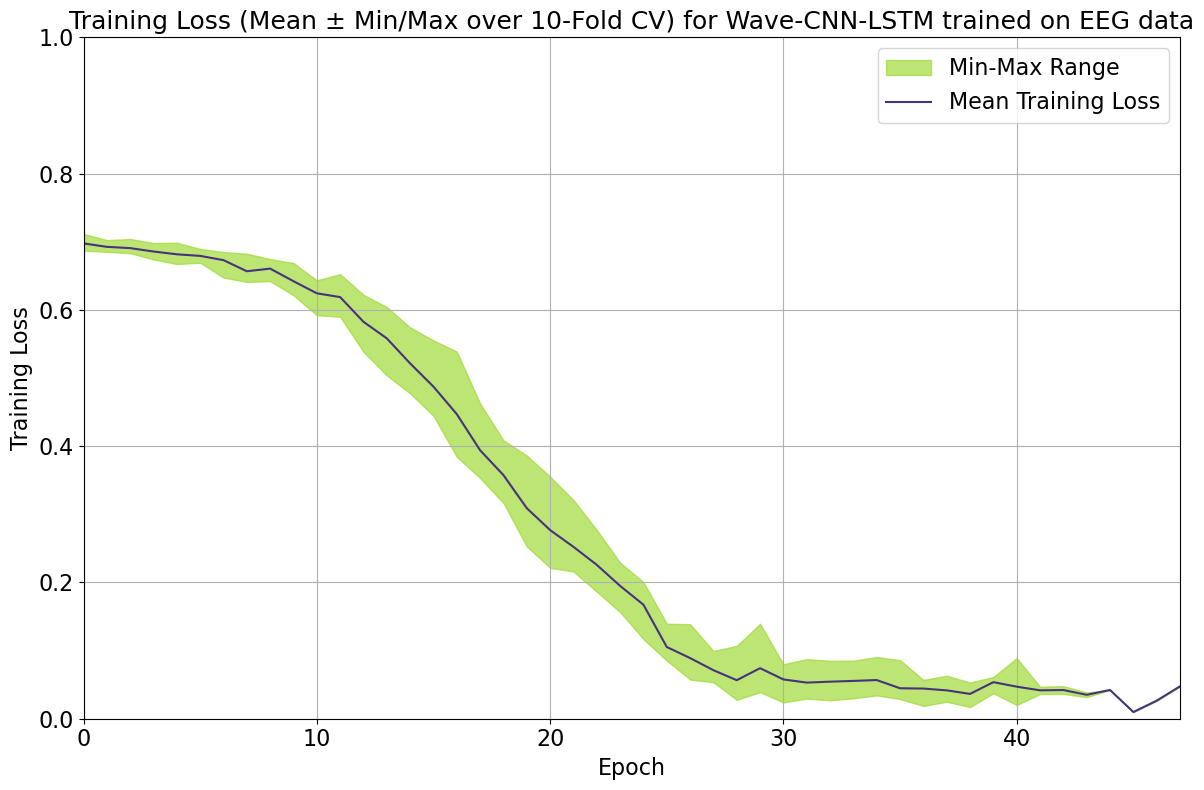

In [25]:
csv_file_path_loss_multi_mean = 'lstm_eeg_loss.csv'
save_path = csv_file_path_loss_multi_mean.replace('.csv', '.png')
title = 'Training Loss (Mean ± Min/Max over 10-Fold CV) for Power-LSTM trained on EEG data'
print_and_save_loss(csv_file_path_loss_multi_mean, save_path, title)

csv_file_path_loss_multi_mean = 'cnn_lstm_eeg_loss.csv'
save_path = csv_file_path_loss_multi_mean.replace('.csv', '.png')
title = 'Training Loss (Mean ± Min/Max over 10-Fold CV) for Wave-CNN-LSTM trained on EEG data'
print_and_save_loss(csv_file_path_loss_multi_mean, save_path, title)

## Mean MaxMin Acc Validation

In [26]:
def print_and_save_acc(csv_file_path_acc_multi_mean_val, save_path, title):
    multi_loss_df = pd.read_csv(DIR + csv_file_path_acc_multi_mean_val)

    # Find relevant validation loss columns
    val_loss_columns = [col for col in multi_loss_df.columns if 'val/acc' in col and '__' not in col]

    # Prepare for plotting
    plot_df = multi_loss_df.melt(id_vars=['epoch'], value_vars=val_loss_columns,
                    var_name='Model', value_name='Validation Accuracy')

    # Clean model names
    plot_df['Model'] = plot_df['Model'].str.replace(' - val/acc', '', regex=False)

    # Group by epoch to compute mean, min, max
    agg_df = plot_df.groupby('epoch')['Validation Accuracy'].agg(['mean', 'min', 'max']).reset_index()

    # Set the seaborn color palette to viridis
    sns.set_palette('viridis')

    # Now plot
    plt.figure(figsize=(12, 8))

    # Shaded area between min and max (automatic first color in seaborn palette)
    sns.lineplot(x=agg_df['epoch'], y=agg_df['min'], alpha=0.0, color=sns.color_palette()[0])  # Dummy to register color

    plt.fill_between(agg_df['epoch'], agg_df['min'], agg_df['max'], color=sns.color_palette()[5], alpha=0.7, label='Min-Max Range')

    # Mean line
    sns.lineplot(x='epoch', y='mean', data=agg_df, label='Mean Validation Accuracy')

    # Titles and labels
    plt.title(title, fontsize=18)
    plt.xlabel('Epoch', fontsize=16)
    plt.ylabel('Validation Accuracy', fontsize=16)
    plt.ylim(0, 1)
    plt.xlim(agg_df['epoch'].min(), agg_df['epoch'].max())
    plt.grid(True)
    plt.legend(fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.tight_layout()
    plt.savefig(PLOTS_PATH + save_path, dpi=600, bbox_inches='tight')
    plt.show()

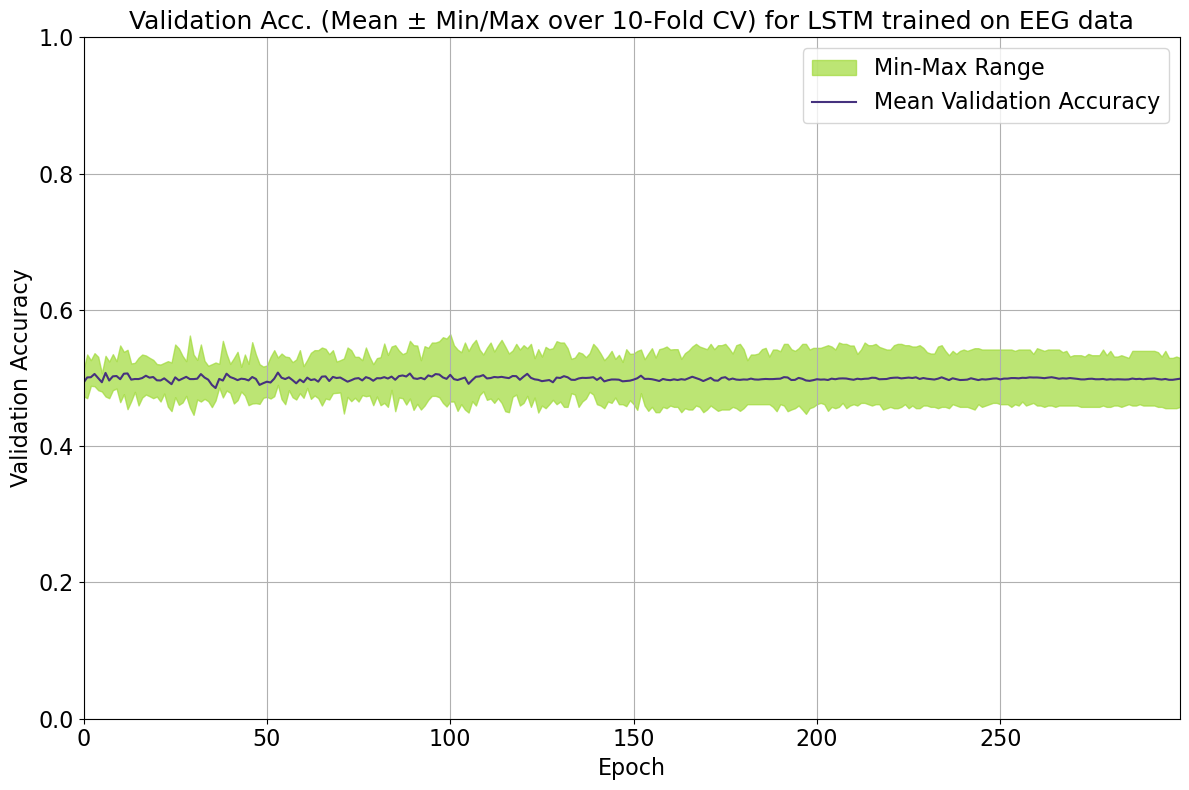

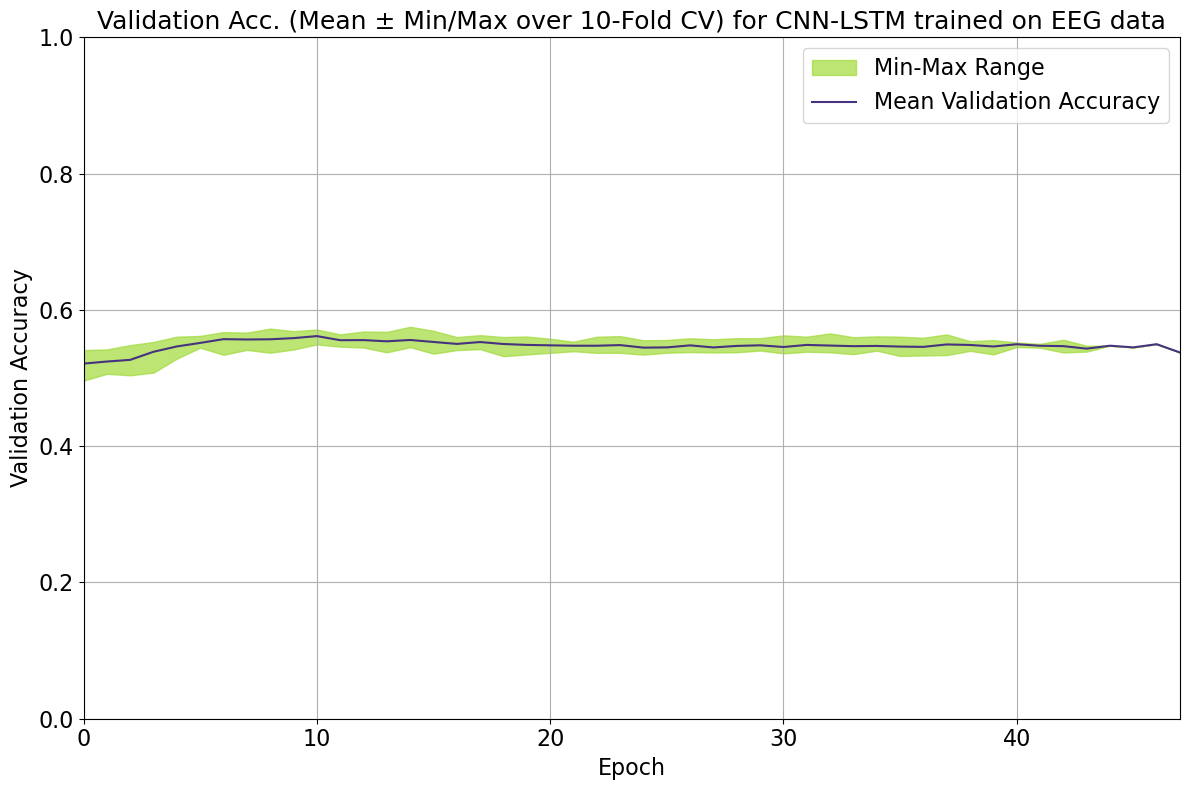

In [64]:
csv_file_path_acc_multi_mean_val = 'lstm_eeg_val_acc.csv'
save_path = csv_file_path_acc_multi_mean_val.replace('.csv', '.png')
title = 'Validation Acc. (Mean ± Min/Max over 10-Fold CV) for LSTM trained on EEG data'
print_and_save_acc(csv_file_path_acc_multi_mean_val, save_path, title)

csv_file_path_acc_multi_mean_val = 'cnn_lstm_eeg_val_acc.csv'
save_path = csv_file_path_acc_multi_mean_val.replace('.csv', '.png')
title = 'Validation Acc. (Mean ± Min/Max over 10-Fold CV) for CNN-LSTM trained on EEG data'
print_and_save_acc(csv_file_path_acc_multi_mean_val, save_path, title)

## Val Acc and Train Loss Subplot

In [27]:
def print_and_save_subplot(
    csv_file_path_acc,
    csv_file_path_loss,
    save_path,
    title_acc,
    title_loss
):
    # --- Load & aggregate validation accuracy ---
    acc_df = pd.read_csv(DIR + csv_file_path_acc)
    acc_cols = [c for c in acc_df.columns if 'val/acc' in c and '__' not in c]
    acc_plot = acc_df.melt(
        id_vars=['epoch'],
        value_vars=acc_cols,
        var_name='Model',
        value_name='Validation Accuracy'
    )
    acc_plot['Model'] = acc_plot['Model'].str.replace(' - val/acc', '', regex=False)
    acc_agg = (
        acc_plot
        .groupby('epoch')['Validation Accuracy']
        .agg(['mean', 'min', 'max'])
        .reset_index()
    )

    # --- Load & aggregate training loss ---
    loss_df = pd.read_csv(DIR + csv_file_path_loss)
    loss_cols = [c for c in loss_df.columns if 'train/loss' in c and '__' not in c]
    loss_plot = loss_df.melt(
        id_vars=['epoch'],
        value_vars=loss_cols,
        var_name='Model',
        value_name='Training Loss'
    )
    loss_plot['Model'] = loss_plot['Model'].str.replace(' - train/loss', '', regex=False)
    loss_agg = (
        loss_plot
        .groupby('epoch')['Training Loss']
        .agg(['mean', 'min', 'max'])
        .reset_index()
    )

    # --- Plot both in a 2×1 subplot ---
    sns.set_palette('viridis')
    fig, axes = plt.subplots(2, 1, figsize=(12, 10))

    # Top: Validation Accuracy
    axes[0].fill_between(
        acc_agg['epoch'],
        acc_agg['min'],
        acc_agg['max'],
        alpha=0.7,
        label='Min–Max Range',
        color=sns.color_palette()[5]
    )
    sns.lineplot(
        x='epoch',
        y='mean',
        data=acc_agg,
        ax=axes[0],
        label='Mean Validation Accuracy',
        color=sns.color_palette()[0]
    )
    axes[0].set_title(title_acc, fontsize=18)
    axes[0].set_ylabel('Validation Accuracy', fontsize=16)
    axes[0].set_ylim(0, 1)
    axes[0].set_xlim(acc_agg['epoch'].min(), acc_agg['epoch'].max())
    axes[0].grid(True)
    axes[0].legend(fontsize=16)
    axes[0].tick_params(labelsize=16)

    # Bottom: Training Loss
    axes[1].fill_between(
        loss_agg['epoch'],
        loss_agg['min'],
        loss_agg['max'],
        alpha=0.7,
        label='Min–Max Range',
        color=sns.color_palette()[5]
    )
    sns.lineplot(
        x='epoch',
        y='mean',
        data=loss_agg,
        ax=axes[1],
        label='Mean Training Loss',
        color=sns.color_palette()[0]
    )
    axes[1].set_title(title_loss, fontsize=18)
    axes[1].set_xlabel('Epoch', fontsize=16)
    axes[1].set_ylabel('Training Loss', fontsize=16)
    axes[1].set_ylim(0, 1)
    axes[1].set_xlim(loss_agg['epoch'].min(), loss_agg['epoch'].max())
    axes[1].grid(True)
    axes[1].legend(fontsize=16)
    axes[1].tick_params(labelsize=16)

    plt.tight_layout()
    plt.savefig(PLOTS_PATH + save_path, dpi=600, bbox_inches='tight')
    plt.show()

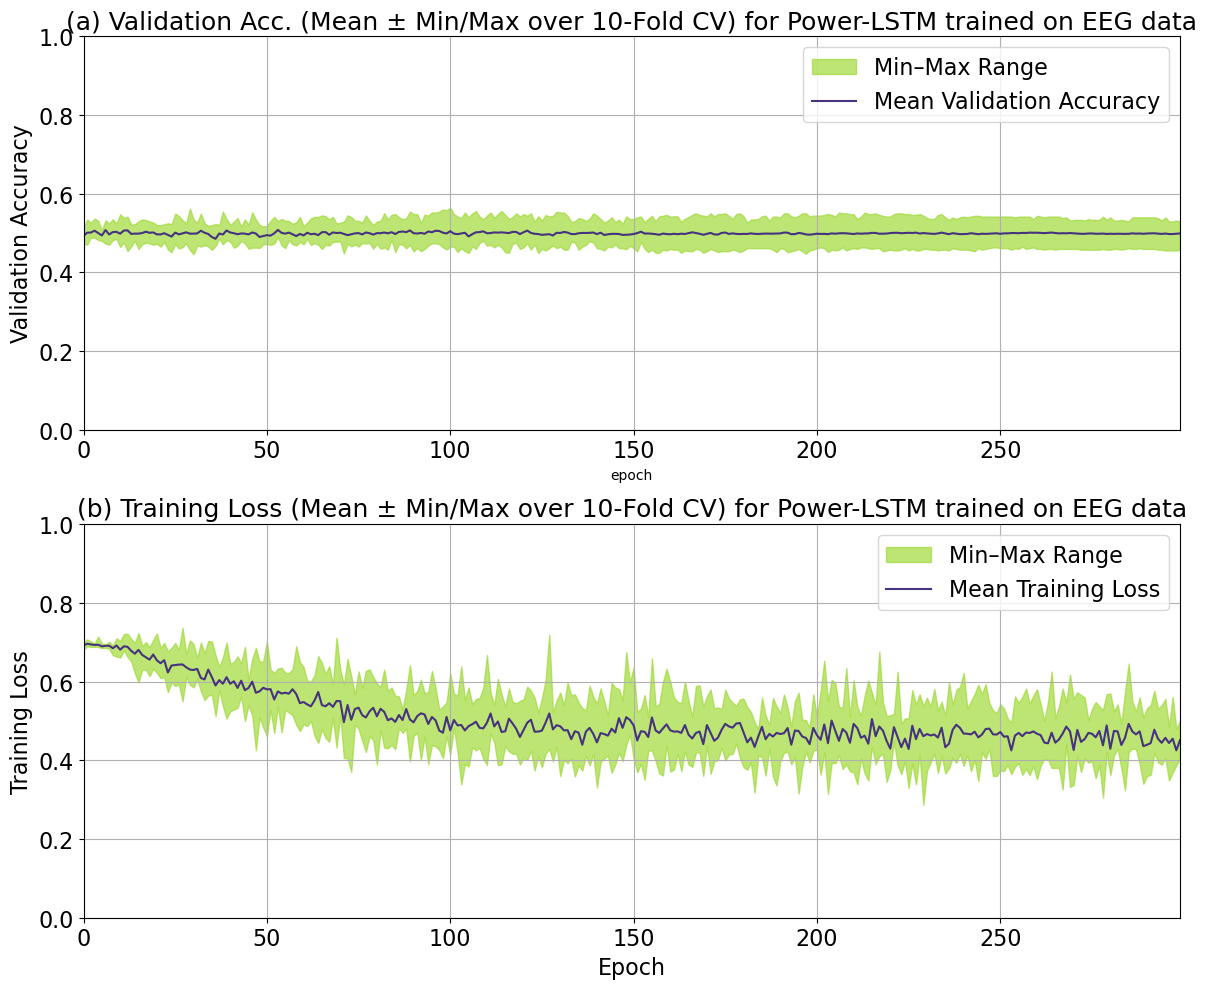

In [28]:
csv_file_path_acc_multi_mean_val = 'lstm_eeg_val_acc.csv'
csv_file_path_loss_multi_mean = 'lstm_eeg_loss.csv'
save_path = csv_file_path_loss_multi_mean.replace('.csv', '_subplot.png')
title_acc = '(a) Validation Acc. (Mean ± Min/Max over 10-Fold CV) for Power-LSTM trained on EEG data'
title_loss = '(b) Training Loss (Mean ± Min/Max over 10-Fold CV) for Power-LSTM trained on EEG data'
print_and_save_subplot(csv_file_path_acc_multi_mean_val, csv_file_path_loss_multi_mean, save_path, title_acc, title_loss)

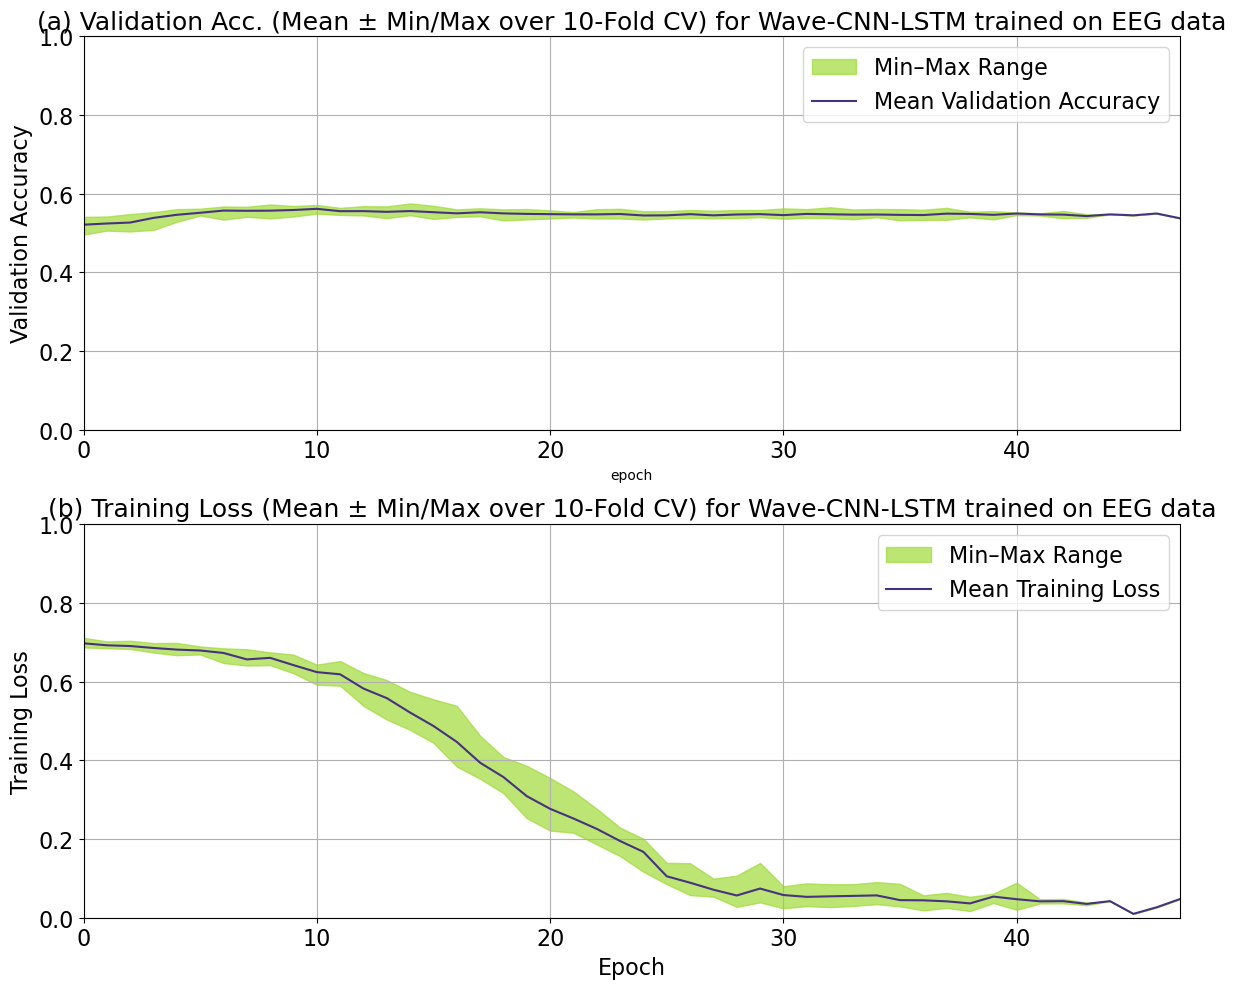

In [29]:
csv_file_path_acc_multi_mean_val = 'cnn_lstm_eeg_val_acc.csv'
csv_file_path_loss_multi_mean = 'cnn_lstm_eeg_loss.csv'
save_path = csv_file_path_loss_multi_mean.replace('.csv', '_subplot.png')
title_acc = '(a) Validation Acc. (Mean ± Min/Max over 10-Fold CV) for Wave-CNN-LSTM trained on EEG data'
title_loss = '(b) Training Loss (Mean ± Min/Max over 10-Fold CV) for Wave-CNN-LSTM trained on EEG data'
print_and_save_subplot(csv_file_path_acc_multi_mean_val, csv_file_path_loss_multi_mean, save_path, title_acc, title_loss)

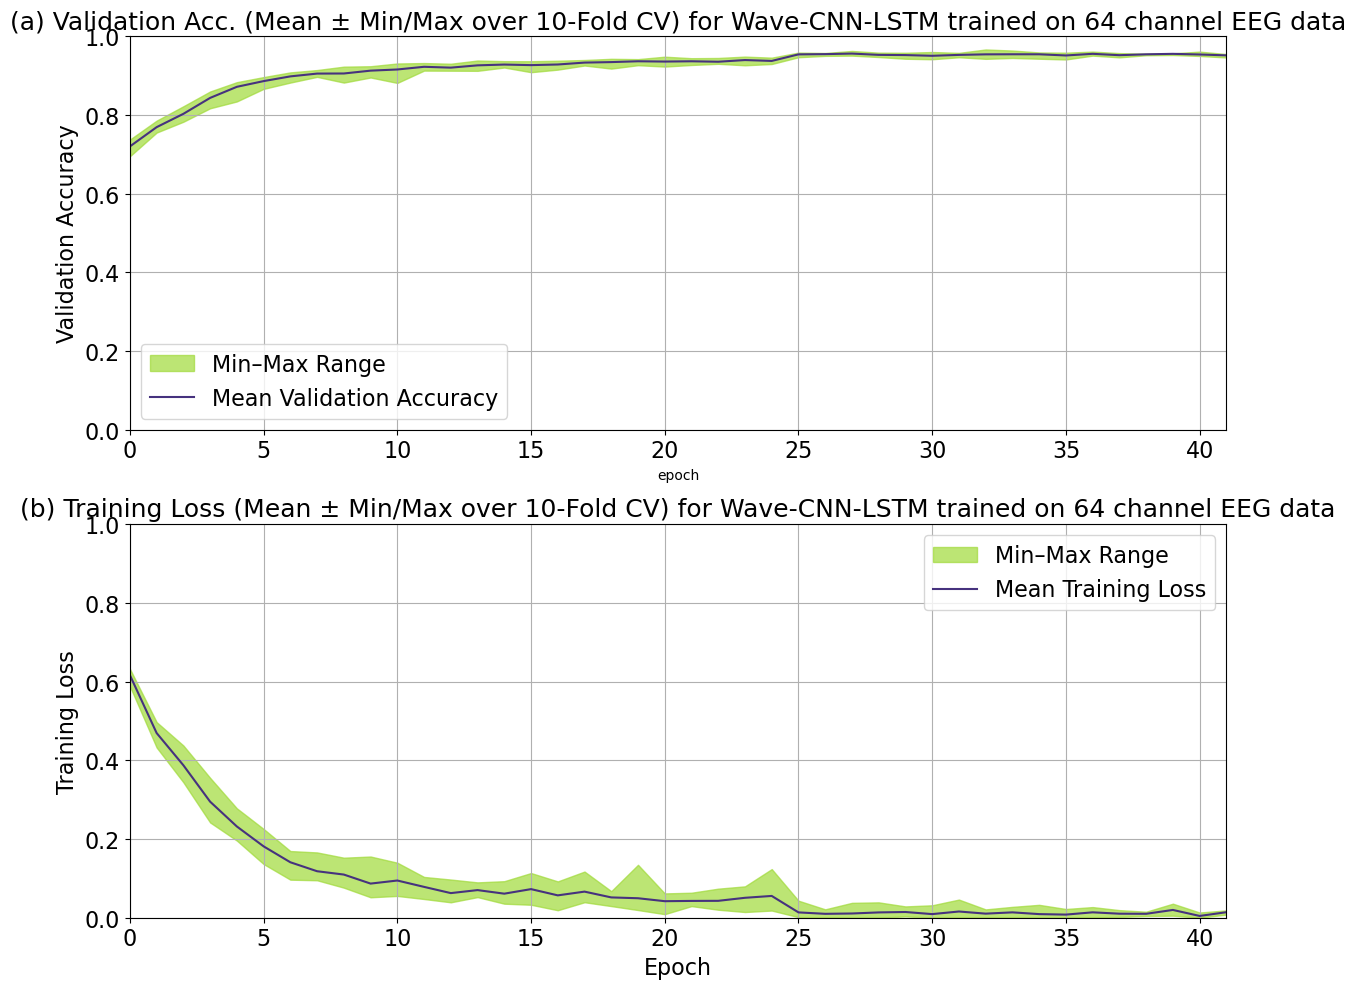

In [35]:
csv_file_path_acc_multi_mean_val = 'cnn_lstm_64_val_acc.csv'
csv_file_path_loss_multi_mean = 'cnn_lstm_64_train_loss.csv'
save_path = csv_file_path_loss_multi_mean.replace('.csv', '_subplot.png')
title_acc = '(a) Validation Acc. (Mean ± Min/Max over 10-Fold CV) for Wave-CNN-LSTM trained on 64 channel EEG data'
title_loss = '(b) Training Loss (Mean ± Min/Max over 10-Fold CV) for Wave-CNN-LSTM trained on 64 channel EEG data'
print_and_save_subplot(csv_file_path_acc_multi_mean_val, csv_file_path_loss_multi_mean, save_path, title_acc, title_loss)

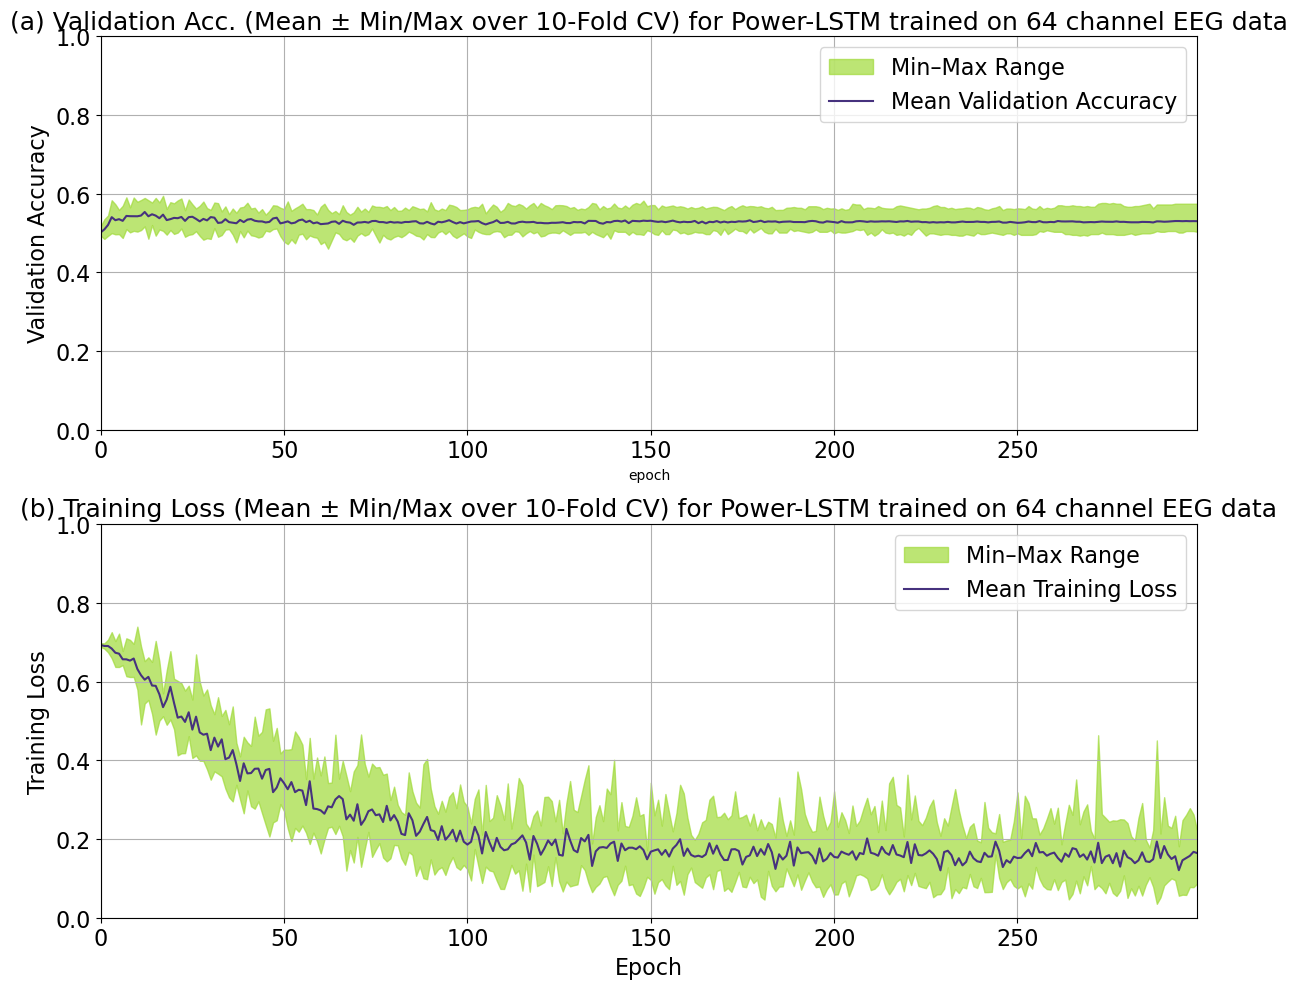

In [36]:
csv_file_path_acc_multi_mean_val = 'lstm_64_val_acc.csv'
csv_file_path_loss_multi_mean = 'lstm_64_train_loss.csv'
save_path = csv_file_path_loss_multi_mean.replace('.csv', '_subplot.png')
title_acc = '(a) Validation Acc. (Mean ± Min/Max over 10-Fold CV) for Power-LSTM trained on 64 channel EEG data'
title_loss = '(b) Training Loss (Mean ± Min/Max over 10-Fold CV) for Power-LSTM trained on 64 channel EEG data'
print_and_save_subplot(csv_file_path_acc_multi_mean_val, csv_file_path_loss_multi_mean, save_path, title_acc, title_loss)

## Conf Matrix Multiple

In [31]:
def print_and_save_conf(csv_file_path_conf_multi, save_path, title):
    multi_conf_df = pd.read_csv(DIR + csv_file_path_conf_multi, index_col=0)

    # Group and pivot to create the confusion matrix
    combined_conf_df = multi_conf_df.groupby(['Actual', 'Predicted'])['nPredictions'].sum().reset_index()
    combined_conf_matrix = combined_conf_df.pivot_table(index='Actual', columns='Predicted', values='nPredictions', fill_value=0)
    combined_conf_matrix = combined_conf_matrix.round().astype(int)

    label_map = {
        'fist': 'Fist',
        'noGesture': 'Rest',
        'open': 'Spread',
        'pinch': 'Double Tap',
        'waveIn': 'Wave In',
        'waveOut': 'Wave Out'
    }

    # --- apply the renaming ---
    combined_conf_matrix = combined_conf_matrix.rename(index=label_map,
                                                    columns=label_map)

    class_order = ['Rest', 'Fist', 'Spread', 'Double Tap', 'Wave In', 'Wave Out']
    combined_conf_matrix = combined_conf_matrix.reindex(
        index=class_order,
        columns=class_order,
        fill_value=0
    )

    # Calculate row sums for normalization
    row_sums = combined_conf_matrix.sum(axis=1)
    vmax_value = 100  # since we're going to work with percentages



    # Normalize by row (to get percentages)
    percentage_conf_matrix = combined_conf_matrix.div(row_sums, axis=0) * 100

    # Create custom annotations with percentage and counts
    annotations = combined_conf_matrix.copy().astype(str)
    for i in range(annotations.shape[0]):
        for j in range(annotations.shape[1]):
            count = combined_conf_matrix.iloc[i, j]
            perc = percentage_conf_matrix.iloc[i, j]
            if count == 0:
                annotations.iloc[i, j] = ""
            else:
                annotations.iloc[i, j] = f"{perc:.1f}%\n({count})"

    # Plot
    plt.figure(figsize=(12, 10))
    ax = sns.heatmap(
        percentage_conf_matrix,
        annot=annotations,
        fmt='',
        cmap='viridis',
        vmin=0,
        vmax=vmax_value,
        cbar_kws={'label': 'Percentage of Predictions (Total number of predictions)'},
        annot_kws={"size": 16}  # Annotation font size
    )

    # Titles and axis labels
    plt.title(
        title,
        fontsize=18
    )
    plt.xlabel('Predicted Label', fontsize=16)
    plt.ylabel('Actual Label', fontsize=16)

    # Tick labels
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    # Colorbar font sizes
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=16)
    cbar.set_label('Percentage of Predictions (Total number of predictions)', fontsize=16)

    plt.tight_layout()
    plt.savefig(PLOTS_PATH + save_path, dpi=600, bbox_inches='tight')
    plt.show()

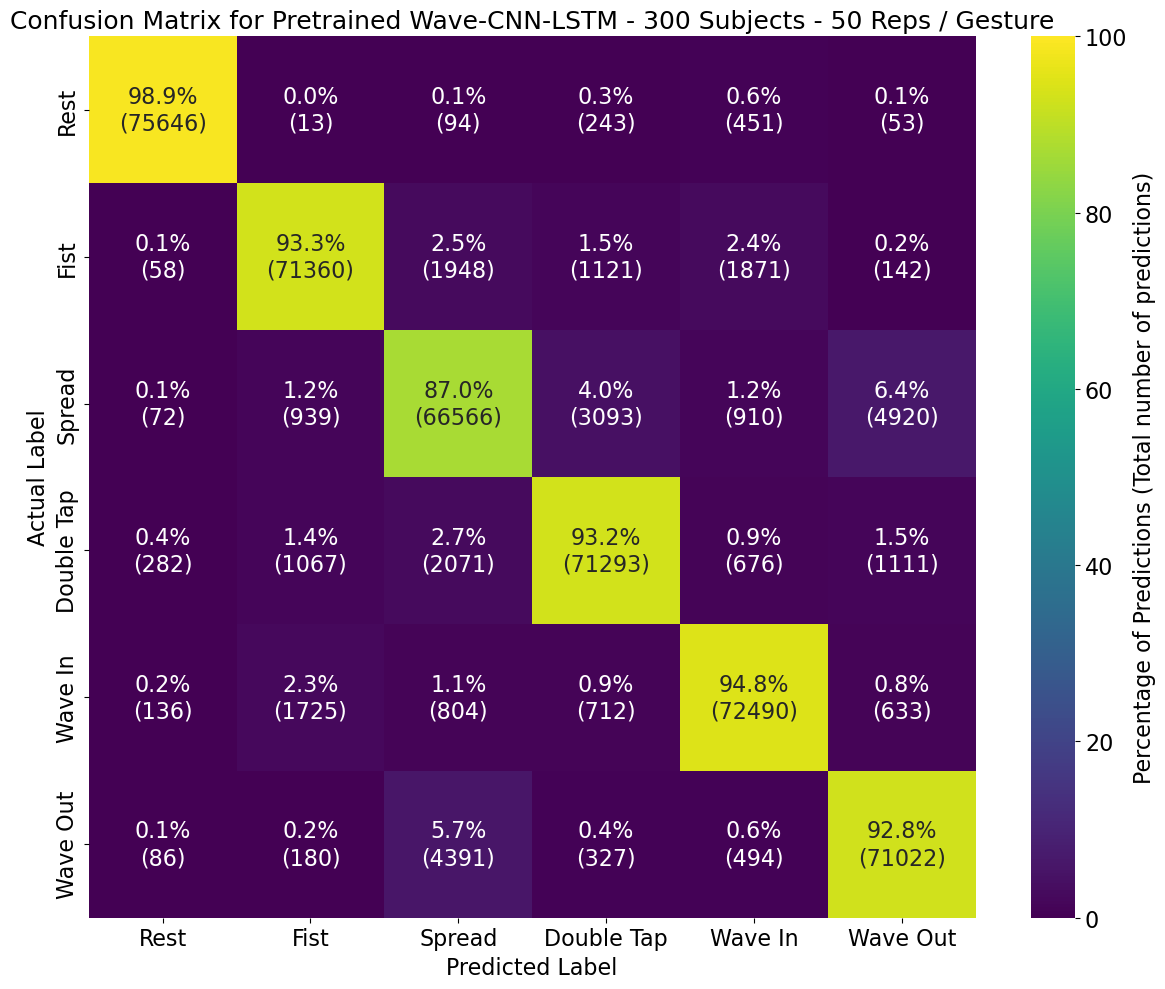

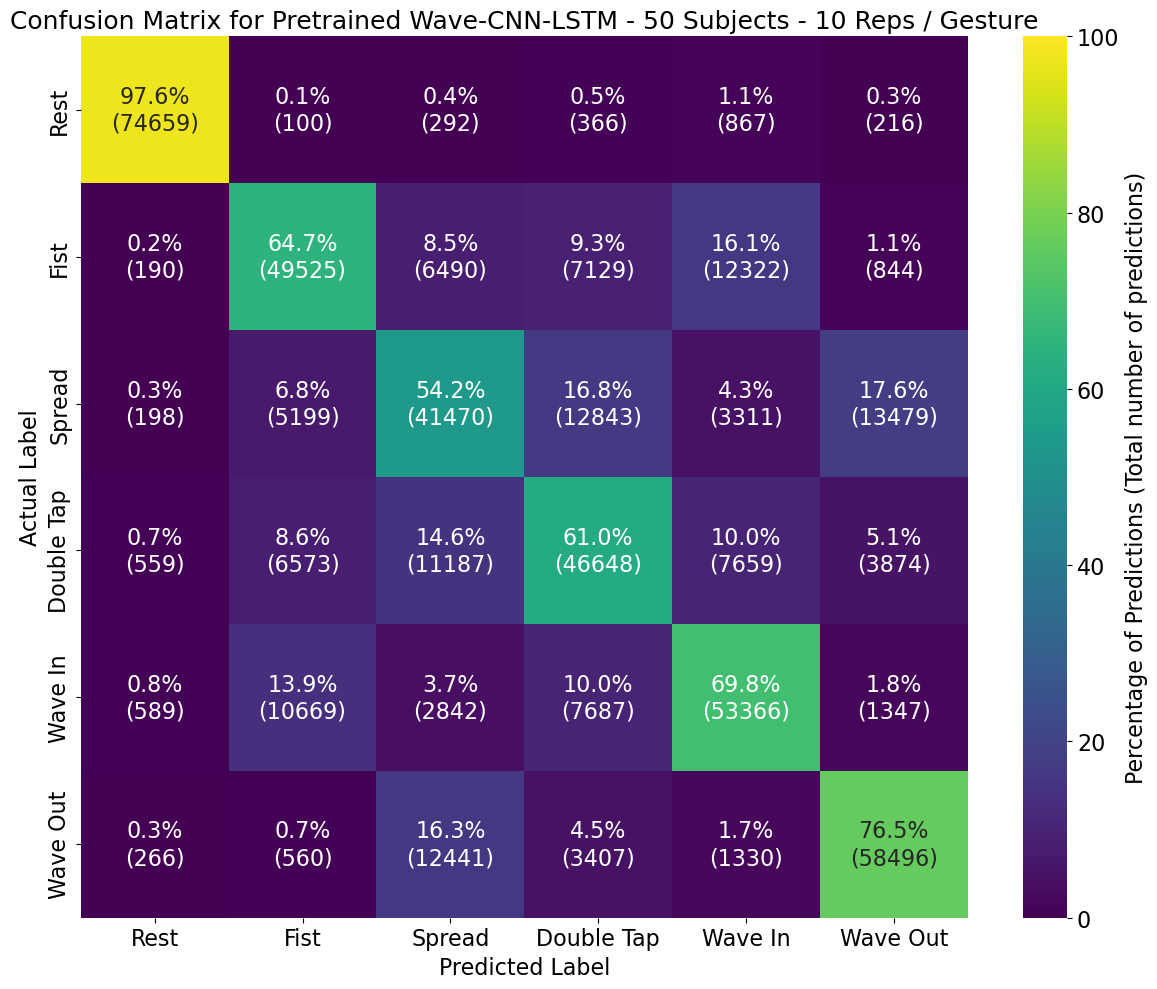

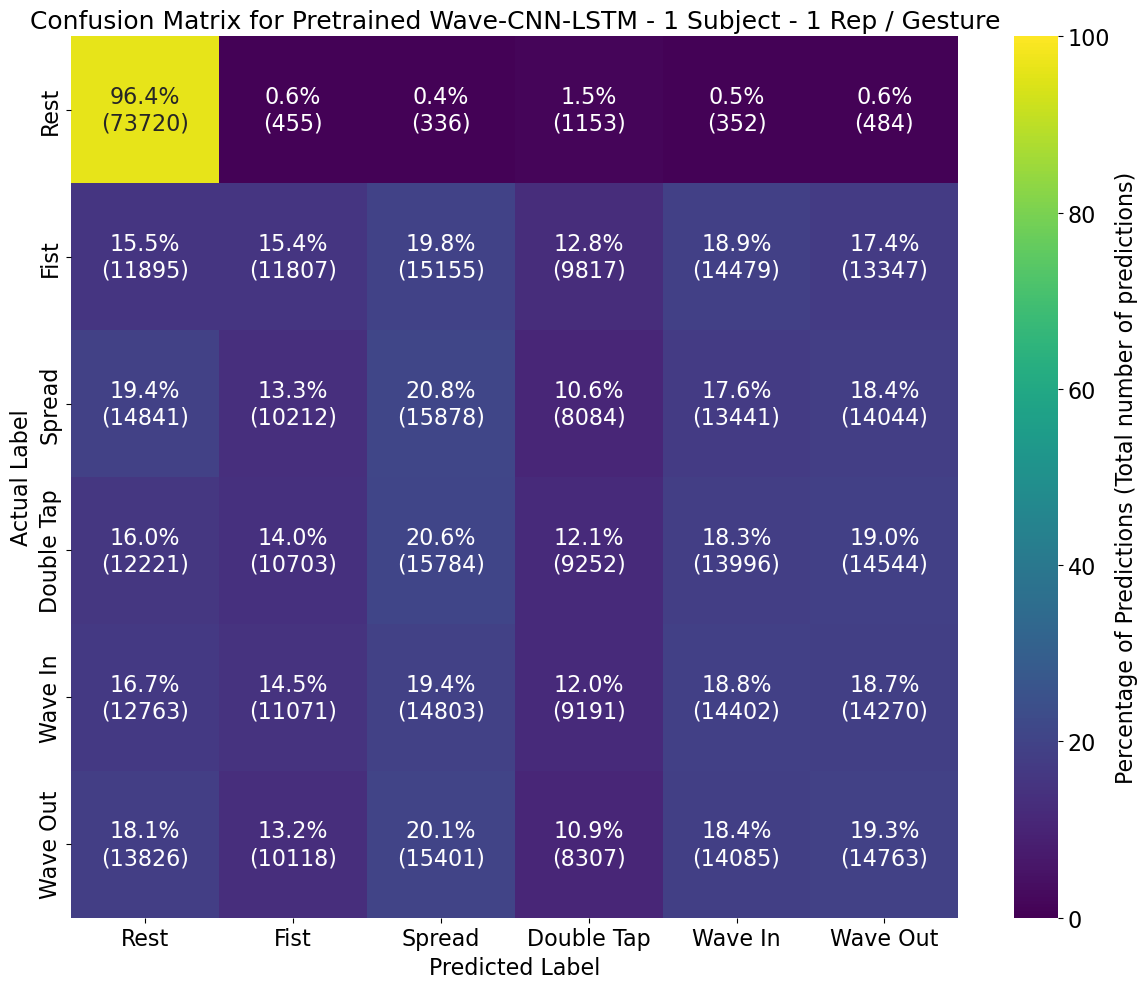

In [32]:
csv_file_path_conf_multi = 'conf_cnnlstm_pretrained_300_50.csv'
save_path = csv_file_path_conf_multi.replace('.csv', '.png')
title = 'Confusion Matrix for Pretrained Wave-CNN-LSTM - 300 Subjects - 50 Reps / Gesture'
print_and_save_conf(csv_file_path_conf_multi, save_path, title)

csv_file_path_conf_multi = 'conf_cnnlstm_pretrained_50_10.csv'
save_path = csv_file_path_conf_multi.replace('.csv', '.png')
title = 'Confusion Matrix for Pretrained Wave-CNN-LSTM - 50 Subjects - 10 Reps / Gesture'
print_and_save_conf(csv_file_path_conf_multi, save_path, title)

csv_file_path_conf_multi = 'conf_cnnlstm_pretrained_1_1.csv'
save_path = csv_file_path_conf_multi.replace('.csv', '.png')
title = 'Confusion Matrix for Pretrained Wave-CNN-LSTM - 1 Subject - 1 Rep / Gesture'
print_and_save_conf(csv_file_path_conf_multi, save_path, title)

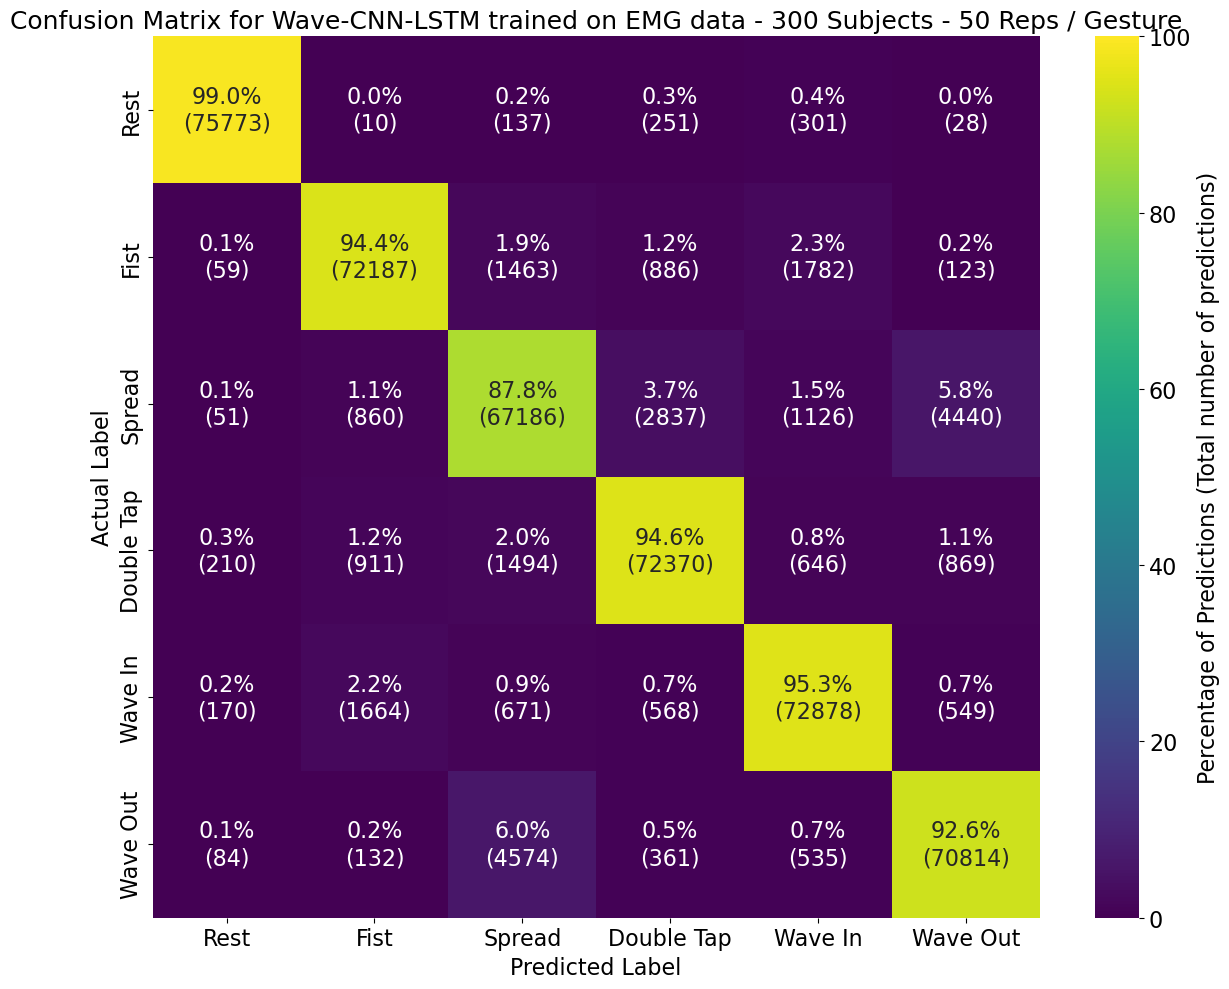

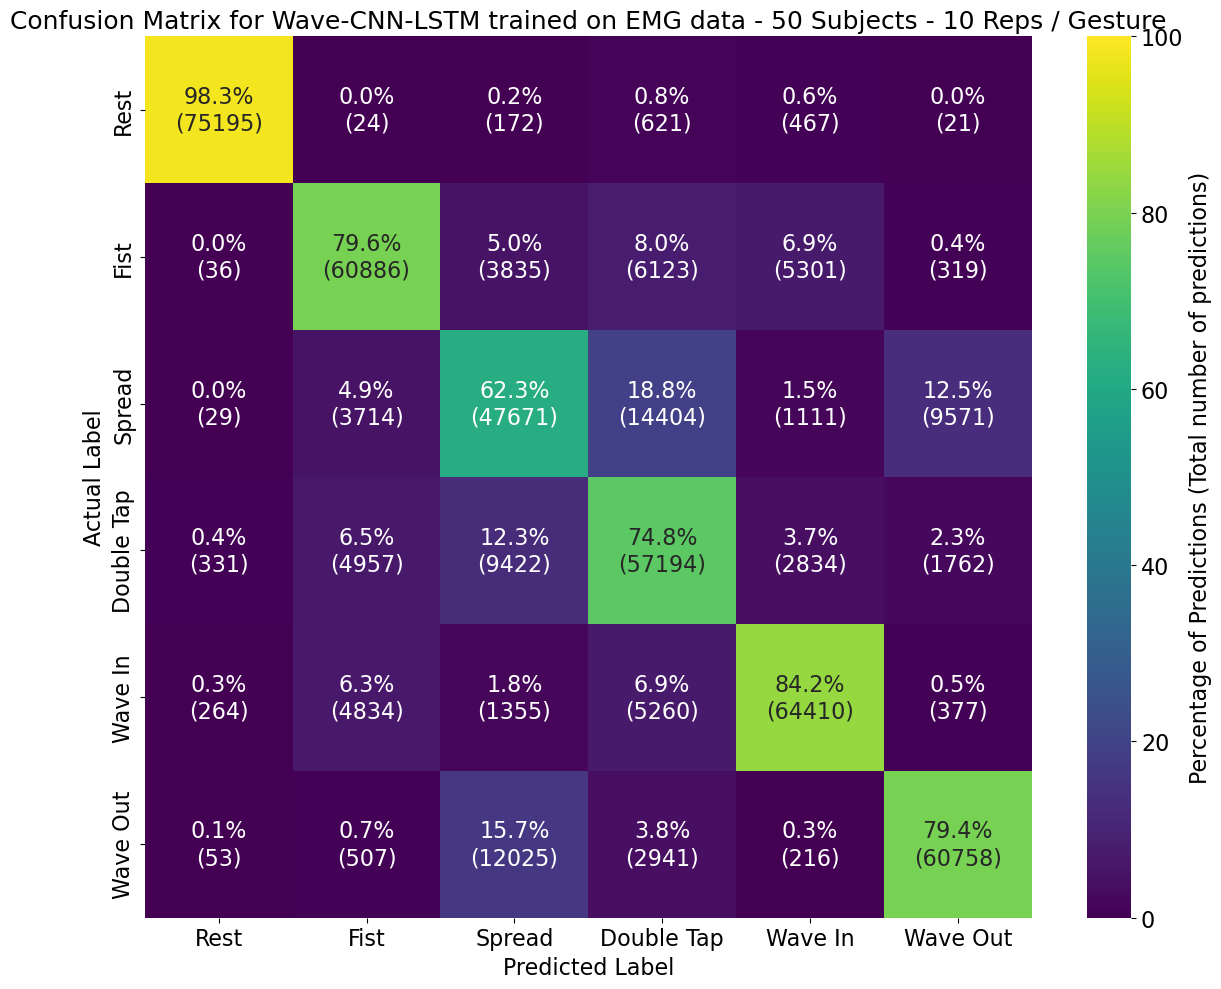

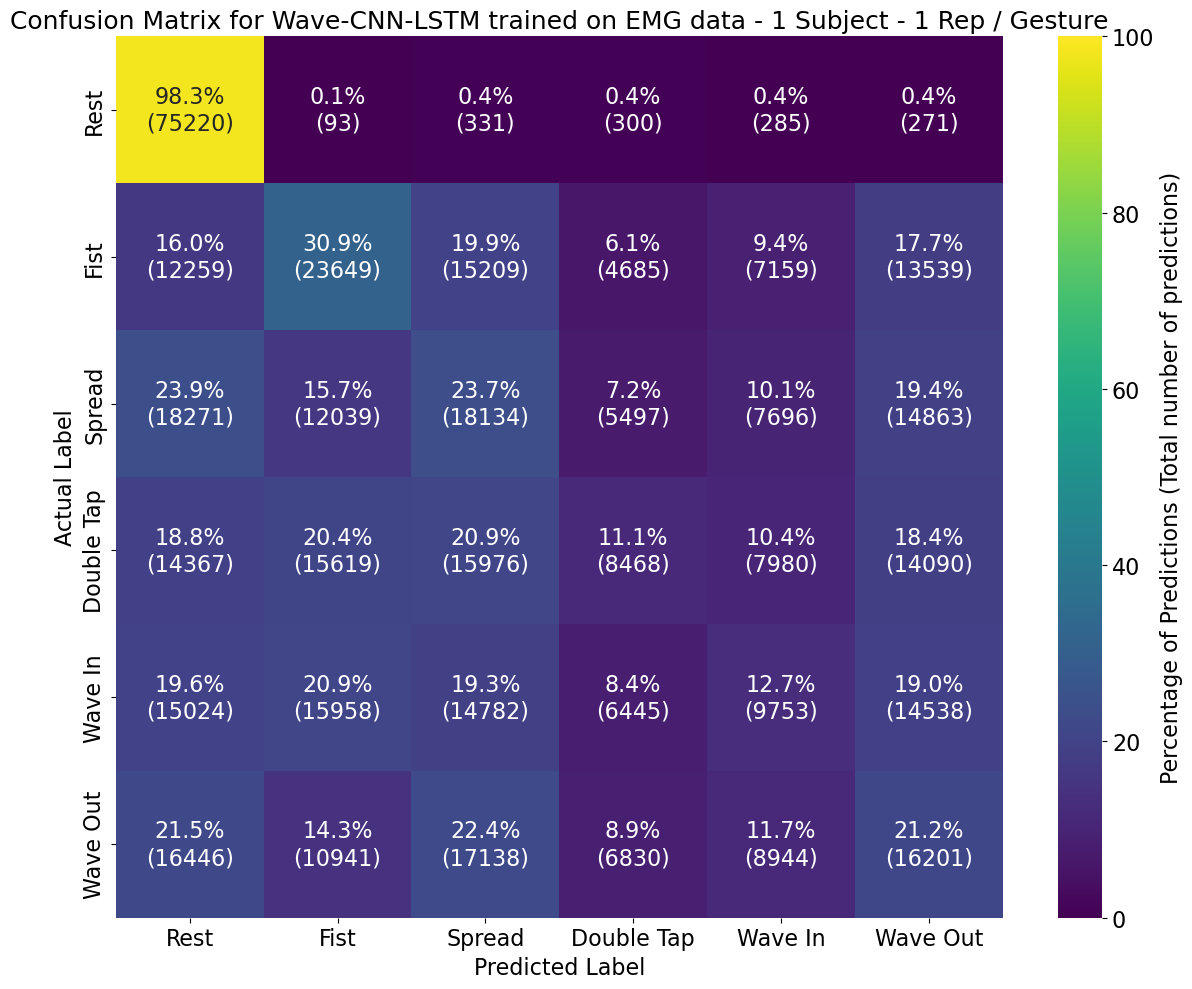

In [33]:
csv_file_path_conf_multi = 'conf_cnnlstm_300_50.csv'
save_path = csv_file_path_conf_multi.replace('.csv', '.png')
title = 'Confusion Matrix for Wave-CNN-LSTM trained on EMG data - 300 Subjects - 50 Reps / Gesture'
print_and_save_conf(csv_file_path_conf_multi, save_path, title)

csv_file_path_conf_multi = 'conf_cnnlstm_50_10.csv'
save_path = csv_file_path_conf_multi.replace('.csv', '.png')
title = 'Confusion Matrix for Wave-CNN-LSTM trained on EMG data - 50 Subjects - 10 Reps / Gesture'
print_and_save_conf(csv_file_path_conf_multi, save_path, title)

csv_file_path_conf_multi = 'conf_cnnlstm_1_1.csv'
save_path = csv_file_path_conf_multi.replace('.csv', '.png')
title = 'Confusion Matrix for Wave-CNN-LSTM trained on EMG data - 1 Subject - 1 Rep / Gesture'
print_and_save_conf(csv_file_path_conf_multi, save_path, title)

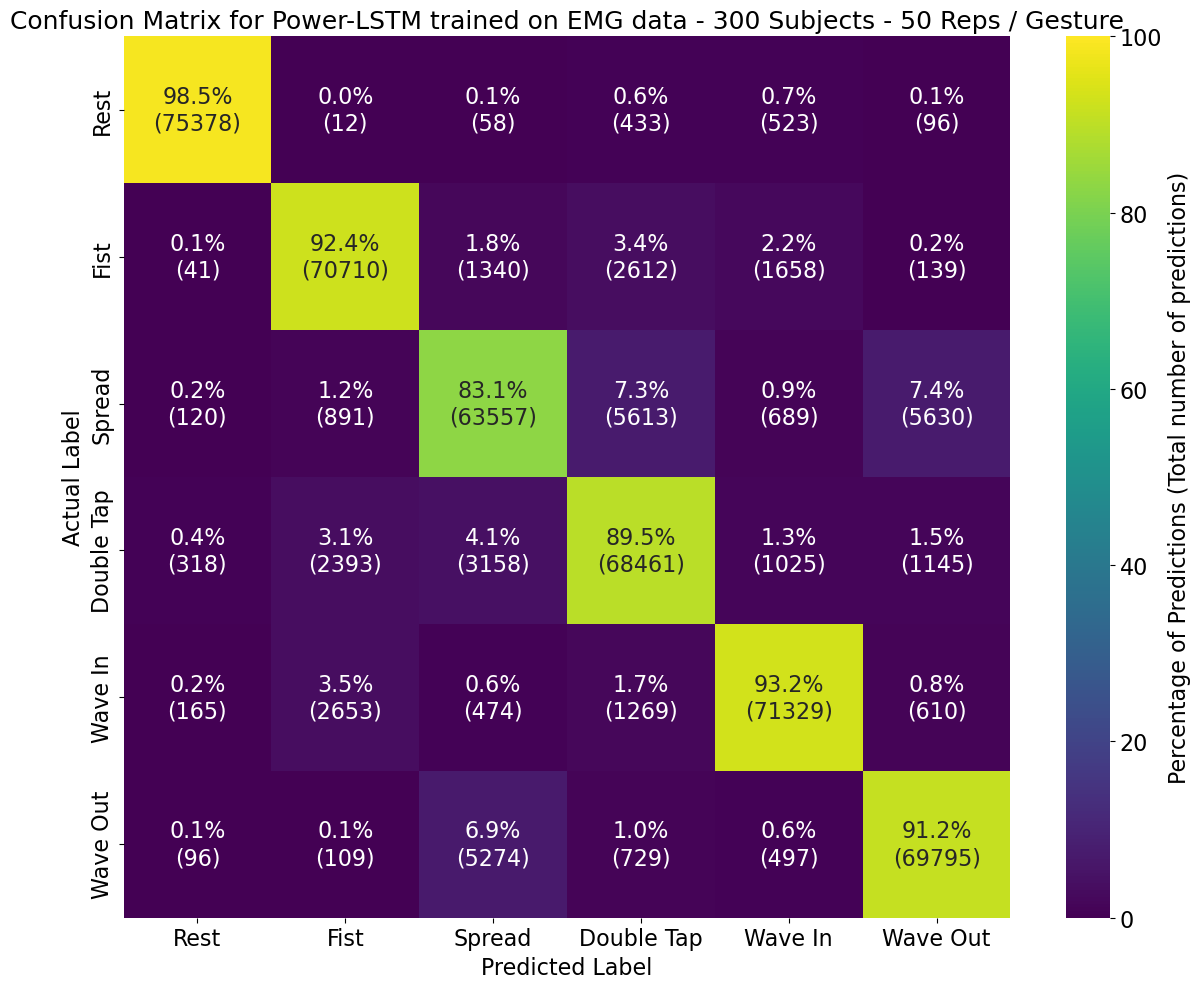

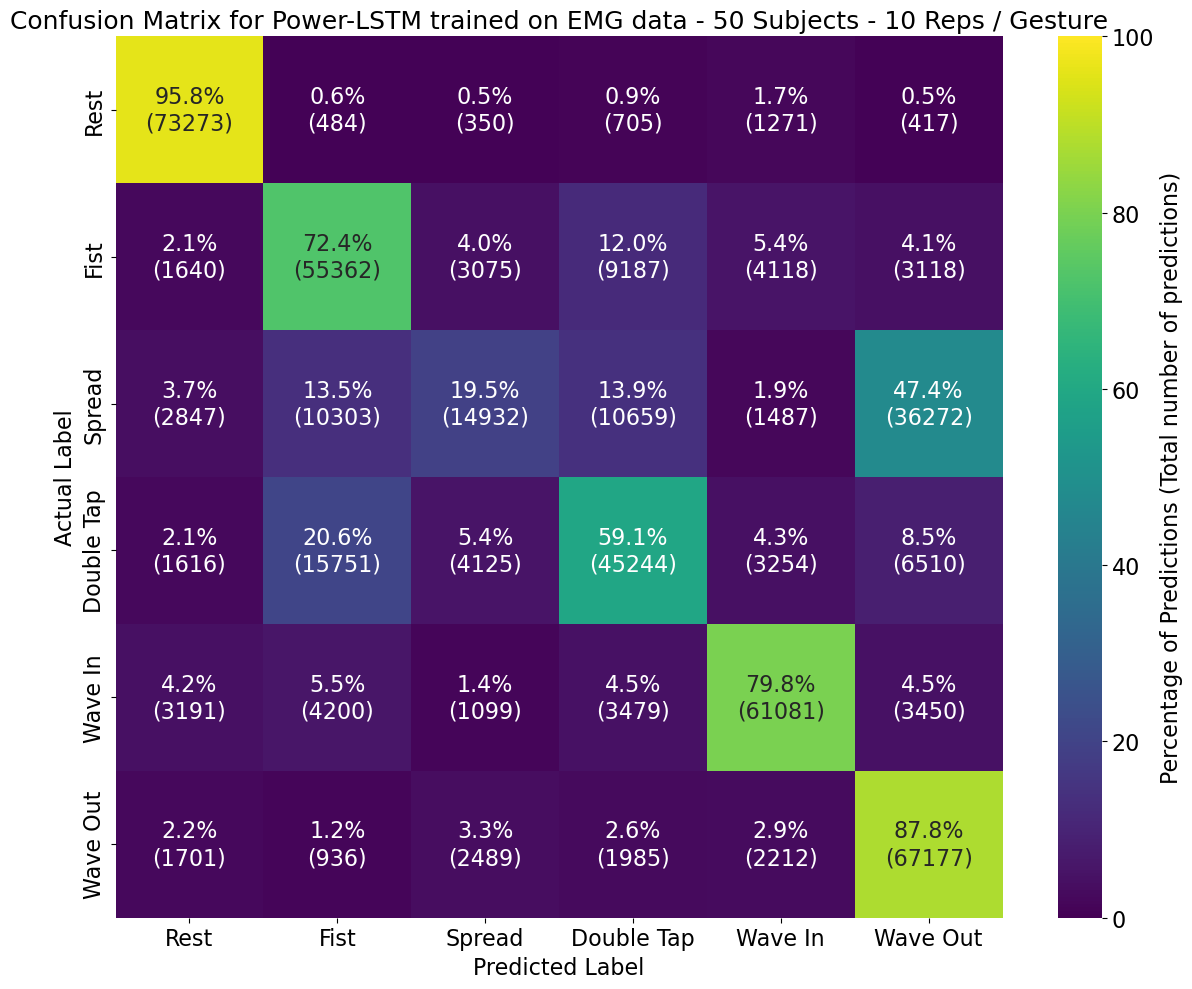

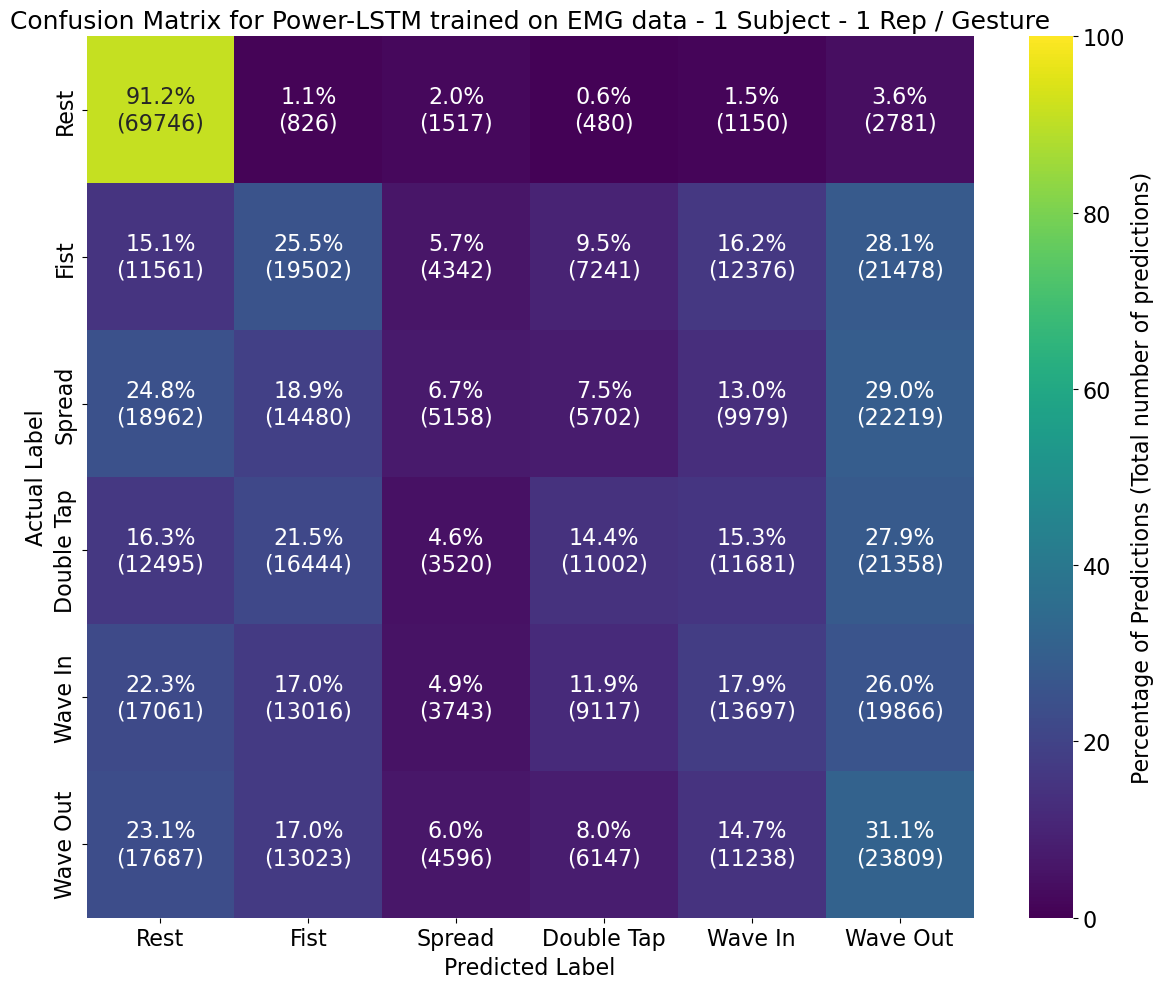

In [34]:
csv_file_path_conf_multi = 'conf_lstm_300_50.csv'
save_path = csv_file_path_conf_multi.replace('.csv', '.png')
title = 'Confusion Matrix for Power-LSTM trained on EMG data - 300 Subjects - 50 Reps / Gesture'
print_and_save_conf(csv_file_path_conf_multi, save_path, title)

csv_file_path_conf_multi = 'conf_lstm_50_10.csv'
save_path = csv_file_path_conf_multi.replace('.csv', '.png')
title = 'Confusion Matrix for Power-LSTM trained on EMG data - 50 Subjects - 10 Reps / Gesture'
print_and_save_conf(csv_file_path_conf_multi, save_path, title)

csv_file_path_conf_multi = 'conf_lstm_1_1.csv'
save_path = csv_file_path_conf_multi.replace('.csv', '.png')
title = 'Confusion Matrix for Power-LSTM trained on EMG data - 1 Subject - 1 Rep / Gesture'
print_and_save_conf(csv_file_path_conf_multi, save_path, title)